### Step 0 : Importing the libraries

In [52]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")  # to ignore the warnings that might occur due to old version of the jupyter notebook or old version of py

### Step 1 : Importing the Dataset

In [53]:
dataset = pd.read_excel('owid-covid-data.xlsx')
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81432,ZWE,Africa,Zimbabwe,2021-04-09,37147.0,95.0,34.857,1535.0,3.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
81433,ZWE,Africa,Zimbabwe,2021-04-10,37273.0,126.0,51.714,1538.0,3.0,2.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
81434,ZWE,Africa,Zimbabwe,2021-04-11,37288.0,15.0,52.143,1538.0,0.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
81435,ZWE,Africa,Zimbabwe,2021-04-12,37307.0,19.0,53.286,1542.0,4.0,2.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [54]:
# Loading at the shape
dataset.shape

(81437, 59)

## Step 2: Preprocessing of Data

#### Removing the "world" rows from the location as it is not a location(exact location) and it is the total of all the locations... So removing the unwanted data

In [55]:
x = dataset[dataset["location"]=="World"]
x

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
79838,OWID_WRL,NaN,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
79839,OWID_WRL,NaN,World,2020-01-23,655.0,98.0,NaN,18.0,1.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
79840,OWID_WRL,NaN,World,2020-01-24,941.0,286.0,NaN,26.0,8.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
79841,OWID_WRL,NaN,World,2020-01-25,1433.0,492.0,NaN,42.0,16.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
79842,OWID_WRL,NaN,World,2020-01-26,2118.0,685.0,NaN,56.0,14.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80281,OWID_WRL,NaN,World,2021-04-09,134691380.0,748045.0,635451.143,2915490.0,13405.0,11062.714,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
80282,OWID_WRL,NaN,World,2021-04-10,135355887.0,664507.0,654746.000,2927897.0,12407.0,11638.429,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
80283,OWID_WRL,NaN,World,2021-04-11,136046628.0,690741.0,674451.429,2936454.0,8557.0,11871.286,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
80284,OWID_WRL,NaN,World,2021-04-12,136663253.0,616625.0,692600.143,2945752.0,9298.0,12133.429,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


In [56]:
# deleting the rows location=world as it irrevalent to count
data = dataset.loc[(dataset["location"]!="World")]
data.shape

(80989, 59)

In [57]:
dataset.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [58]:
# Looking at the different loactions
data['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'European Union', 'Faeroe Islands', 'Falkland Islands',
       'Fiji', 'Finland', 'Fran

In [59]:
dataset.isna().any()   #checking for NAN values in the dataset

iso_code                                 False
continent                                 True
location                                 False
date                                     False
total_cases                               True
new_cases                                 True
new_cases_smoothed                        True
total_deaths                              True
new_deaths                                True
new_deaths_smoothed                       True
total_cases_per_million                   True
new_cases_per_million                     True
new_cases_smoothed_per_million            True
total_deaths_per_million                  True
new_deaths_per_million                    True
new_deaths_smoothed_per_million           True
reproduction_rate                         True
icu_patients                              True
icu_patients_per_million                  True
hosp_patients                             True
hosp_patients_per_million                 True
weekly_icu_ad

In [60]:
# Getting the ssum of null values across each column
dataset.isna().sum()

iso_code                                     0
continent                                 3958
location                                     0
date                                         0
total_cases                               1748
new_cases                                 1750
new_cases_smoothed                        2751
total_deaths                             11269
new_deaths                               11111
new_deaths_smoothed                       2751
total_cases_per_million                   2180
new_cases_per_million                     2182
new_cases_smoothed_per_million            3178
total_deaths_per_million                 11688
new_deaths_per_million                   11530
new_deaths_smoothed_per_million           3178
reproduction_rate                        15589
icu_patients                             72981
icu_patients_per_million                 72981
hosp_patients                            71310
hosp_patients_per_million                71310
weekly_icu_ad

### Creating a new dataset that contains only the important columns

In [61]:
covid = data.filter(['continent','location','date','total_cases','total_deaths','total_tests','total_vaccinations'])
covid

,continent,location,date,total_cases,total_deaths,total_tests,total_vaccinations
0,Asia,Afghanistan,2020-02-24,1.0,NaN,NaN,NaN
1,Asia,Afghanistan,2020-02-25,1.0,NaN,NaN,NaN
2,Asia,Afghanistan,2020-02-26,1.0,NaN,NaN,NaN
3,Asia,Afghanistan,2020-02-27,1.0,NaN,NaN,NaN
4,Asia,Afghanistan,2020-02-28,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
81432,Africa,Zimbabwe,2021-04-09,37147.0,1535.0,453512.0,206205.0
81433,Africa,Zimbabwe,2021-04-10,37273.0,1538.0,455679.0,222733.0
81434,Africa,Zimbabwe,2021-04-11,37288.0,1538.0,456936.0,223492.0
81435,Africa,Zimbabwe,2021-04-12,37307.0,1542.0,458047.0,234579.0


### Getting the cases in India

In [62]:
india_case=data[dataset["location"]=="India"]

In [63]:
india_case.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
33479,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33480,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33481,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33482,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33483,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [65]:
# making a dataframe for last 5 days
india_last_5_day = india_case.tail()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


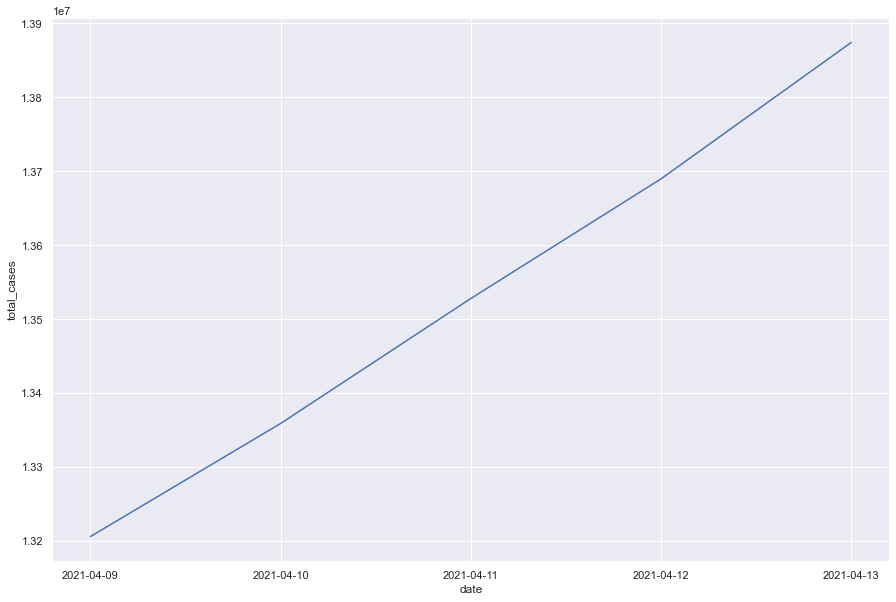

In [66]:
# Total cases in last 5 days
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_day)
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


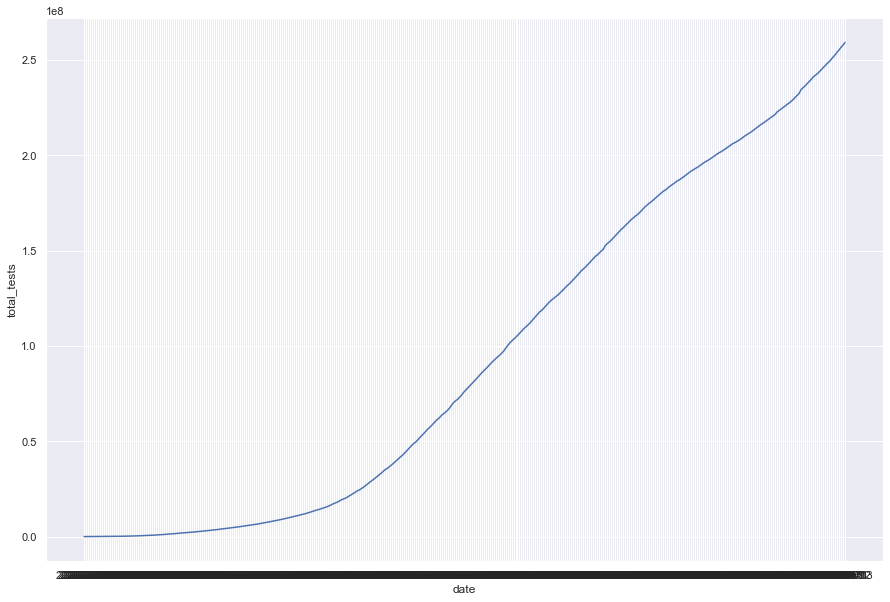

In [67]:
# Total tests per day
sns.set(rc = {'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_tests",data=india_case)
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


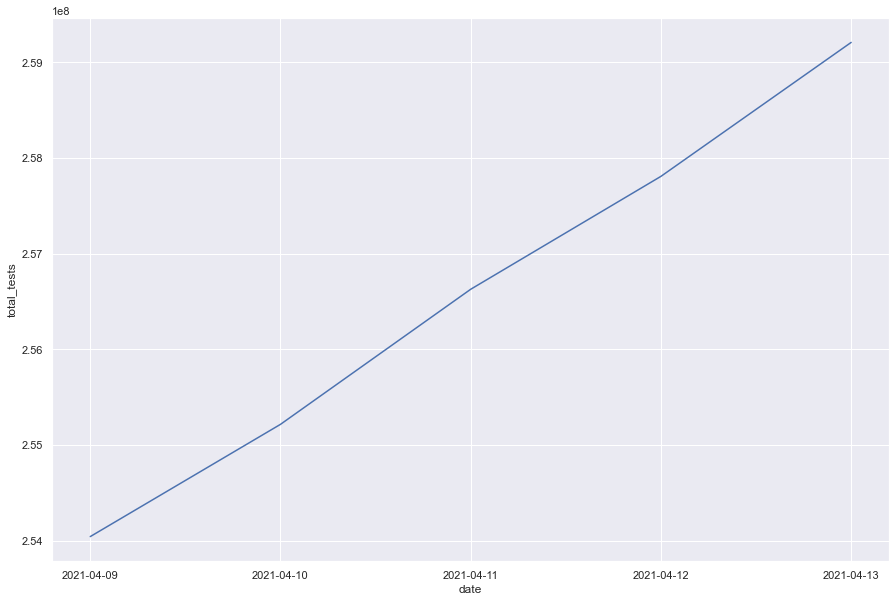

In [68]:
# Total tests in last 5 days
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_tests",data=india_last_5_day)
plt.show()

In [69]:
# find the highest number of deaths in the country by using max function 
y=covid.groupby(['location'])['total_cases'].max()
y.idxmax()
y.max()

42215096.0

In [70]:
data.groupby(['location'], as_index=True)['total_cases'].max()

location
Afghanistan      57364.0
Africa         4370297.0
Albania         128752.0
Algeria         118799.0
Andorra          12614.0
                 ...    
Venezuela       176972.0
Vietnam           2714.0
Yemen             5507.0
Zambia           90218.0
Zimbabwe         37330.0
Name: total_cases, Length: 214, dtype: float64

In [71]:
covid.loc[covid['total_cases'].idxmax()]

continent                     NaN
location                   Europe
date                   2021-04-13
total_cases           4.22151e+07
total_deaths               960665
total_tests                   NaN
total_vaccinations    1.62635e+08
Name: 25145, dtype: object

In [72]:
df=covid.groupby(["location"])[["total_cases"]].max()
df

,total_cases
location,
Afghanistan,57364.0
Africa,4370297.0
Albania,128752.0
Algeria,118799.0
Andorra,12614.0
...,...
Venezuela,176972.0
Vietnam,2714.0
Yemen,5507.0


### Which country/state is having highest number of cases?

In [73]:
print(df.loc[df.total_cases.idxmax()])

total_cases    42215096.0
Name: Europe, dtype: float64


In [74]:
print("Highest cases country is ",df.total_cases.idxmax()," with number of cases as ",df.max())

Highest cases country is  Europe  with number of cases as  total_cases    42215096.0
dtype: float64


### Which country/state is having lowest number of cases?

In [75]:
print(df.loc[df.total_cases.idxmin()])

total_cases    1.0
Name: Micronesia (country), dtype: float64


In [76]:
print("Lowest cases country is ",df.total_cases.idxmin()," with number of cases as ",df.min())

Lowest cases country is  Micronesia (country)  with number of cases as  total_cases    1.0
dtype: float64


### Which country/state is having lowest number of deaths?

In [77]:
u=covid.groupby(['location'])['total_deaths'].max()
print("Lowest death country is ",u.idxmin()," with number of deaths as ",u.min())

Lowest death country is  Bhutan  with number of deaths as  1.0


### Which country/state is having highest number of deaths?

In [78]:
t=covid.groupby(['location'])['total_deaths'].max()
print("Highest death country is ",t.idxmax()," with number of deaths as ",t.max())

Highest death country is  Europe  with number of deaths as  960665.0


## Forecasting using FbProphet for 30 days for total_deaths

In [79]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [80]:
# check prophet version
import fbprophet

# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.6


Now for the fb prophet to work on the forecating of the deaths lets take the world rows only as it would tell us that the number of deaths in the whole world by a particular date.
Similarly we can use the world rows for the number of test_cases too.

In [81]:
df1 = dataset.filter(['date','location','total_deaths','total_cases'])
df2 = df1.loc[(dataset["location"]=="World")]
df2

,date,location,total_deaths,total_cases
79838,2020-01-22,World,17.0,557.0
79839,2020-01-23,World,18.0,655.0
79840,2020-01-24,World,26.0,941.0
79841,2020-01-25,World,42.0,1433.0
79842,2020-01-26,World,56.0,2118.0
...,...,...,...,...
80281,2021-04-09,World,2915490.0,134691380.0
80282,2021-04-10,World,2927897.0,135355887.0
80283,2021-04-11,World,2936454.0,136046628.0
80284,2021-04-12,World,2945752.0,136663253.0


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


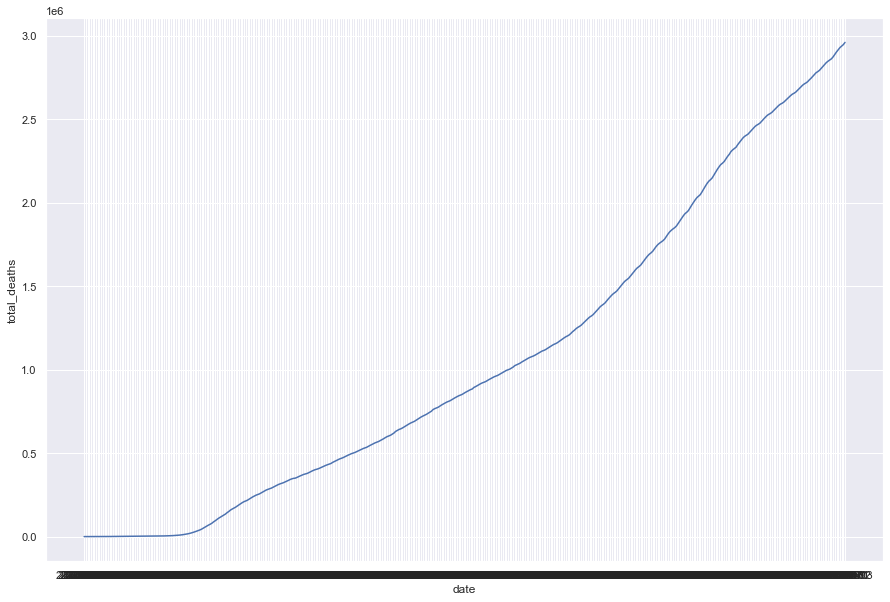

In [82]:
df3 = df2.filter(['date','total_deaths'])

sns.set(rc = {'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_deaths",data=df3)
plt.show()

From the above graph we can see that, date increases and the number of deaths also increases simutaneously.

In [83]:
# prepare the expected columns names
df3.columns = ['ds','y']
df3['ds'] = pd.to_datetime(df3['ds'])

df3

,ds,y
79838,2020-01-22,17.0
79839,2020-01-23,18.0
79840,2020-01-24,26.0
79841,2020-01-25,42.0
79842,2020-01-26,56.0
...,...,...
80281,2021-04-09,2915490.0
80282,2021-04-10,2927897.0
80283,2021-04-11,2936454.0
80284,2021-04-12,2945752.0


In [84]:
from fbprophet import Prophet
# define the model
model = Prophet()
# fit the model
model.fit(df3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [86]:
prediction_size = 30
# define the period for which we want a prediction
future = model.make_future_dataframe(prediction_size)
future.tail()

,ds
473,2021-05-09
474,2021-05-10
475,2021-05-11
476,2021-05-12
477,2021-05-13


In [87]:
df2 = df2.reset_index(drop=True).dropna()
df3 = df3.reset_index(drop=True).dropna()
future = future.reset_index(drop=True).dropna()

In [88]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
473,2021-05-09,3.241393e+06,3.211331e+06,3.267764e+06,3.212518e+06,3.264724e+06,-926.969108,-926.969108,-926.969108,-926.969108,-926.969108,-926.969108,0.0,0.0,0.0,3.240466e+06
474,2021-05-10,3.251820e+06,3.217652e+06,3.278043e+06,3.221573e+06,3.276022e+06,-2187.768458,-2187.768458,-2187.768458,-2187.768458,-2187.768458,-2187.768458,0.0,0.0,0.0,3.249633e+06
475,2021-05-11,3.262248e+06,3.225500e+06,3.292918e+06,3.230012e+06,3.288563e+06,-1085.433229,-1085.433229,-1085.433229,-1085.433229,-1085.433229,-1085.433229,0.0,0.0,0.0,3.261162e+06
476,2021-05-12,3.272675e+06,3.235712e+06,3.305040e+06,3.237313e+06,3.300755e+06,219.356065,219.356065,219.356065,219.356065,219.356065,219.356065,0.0,0.0,0.0,3.272894e+06
477,2021-05-13,3.283102e+06,3.244895e+06,3.317619e+06,3.245980e+06,3.313155e+06,1068.999007,1068.999007,1068.999007,1068.999007,1068.999007,1068.999007,0.0,0.0,0.0,3.284171e+06


From the `forecast=model.predict(future)` we get all the necessary columns that we need for the forecasting purpose.

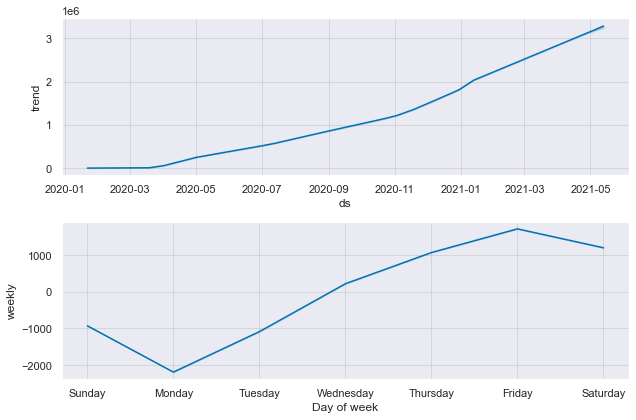

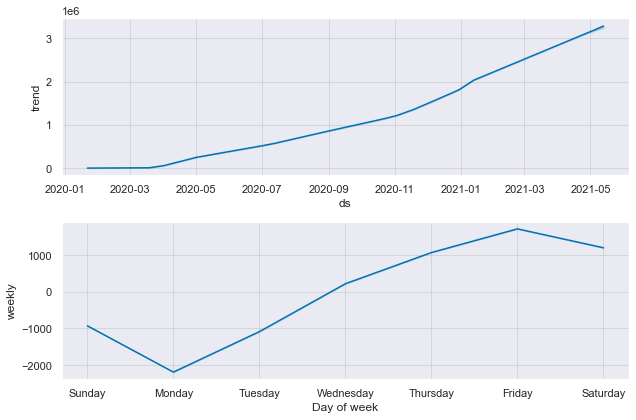

In [89]:
model.plot_components(forecast)

Above graph1 shows the `trend and date(months wise)` graph were the number goes on increasing exponentially.
And the graph2 shows the `weekly bases of the total deaths cases`, it is down on Monday - the reason might be due less report or due to some other reasons...

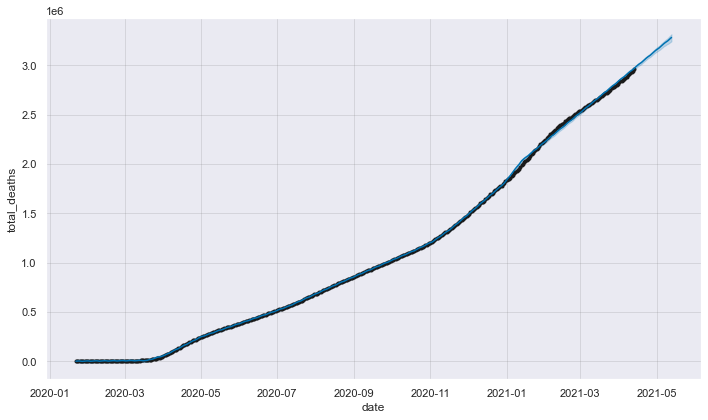

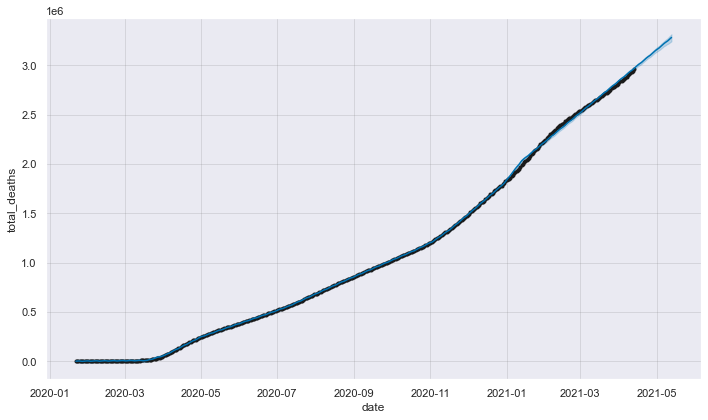

In [90]:
model.plot(forecast,xlabel = 'date', ylabel = 'total_deaths')

In [91]:
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [92]:
trace = go.Scatter(
    name = 'Actual Death',
    mode = 'markers',
    x = list(df3['ds']),
    y = list(df3['y']),
    marker=dict(
        color='#FFBAD2',
        line=dict(width=1)
    )
)

In [93]:
trace1 = go.Scatter(
    name = 'trend',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat']),
    marker=dict(
        color='red',
        line=dict(width=3)
    )
)

In [94]:
upper_band = go.Scatter(
    name = 'upper band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_upper']),
    line= dict(color='#57b88f'),
    fill = 'tonexty'
)

In [95]:
lower_band = go.Scatter(
    name= 'lower band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_lower']),
    line= dict(color='#1705ff')
)

In [96]:
tracex = go.Scatter(
    name = 'Actual Death',
   mode = 'markers',
   x = list(df3['ds']),
   y = list(df3['y']),
   marker=dict(
      color='black',
      line=dict(width=2)
   )
)

In [97]:
data = [tracex, trace1, lower_band, upper_band, trace]

layout = dict(title='Death prediction due to covid-19 Using FbProphet',
             xaxis=dict(title = 'Dates', ticklen=2, zeroline=True))

figure=dict(data=data,layout=layout)

In [98]:
plt.savefig('forecastcovid_death.png')

<Figure size 1080x720 with 0 Axes>

In [99]:
py.offline.iplot(figure)
# plt.show()